In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Datasets

In [55]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

dataset_path

'/home/fmind/.keras/datasets/auto-mpg.data'

In [62]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [63]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [64]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [65]:
train_stats = train_dataset.describe().transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


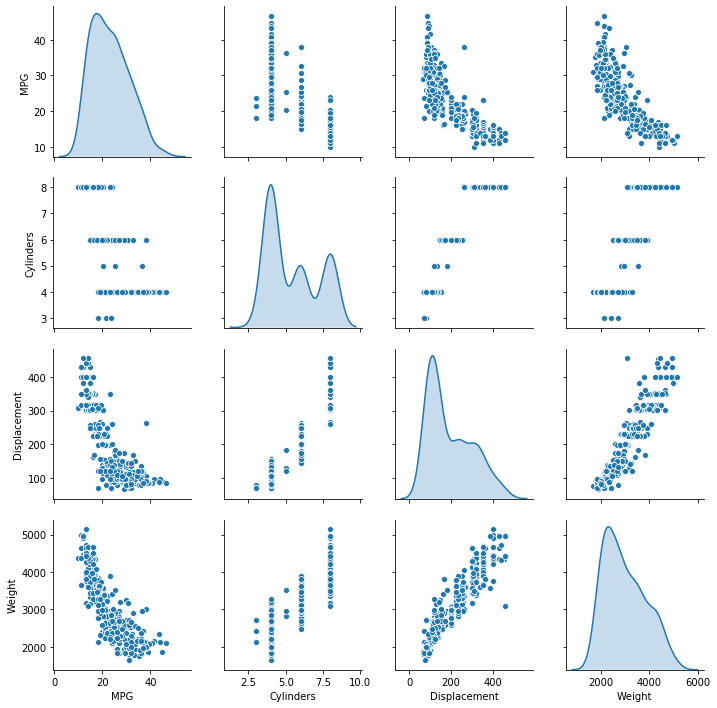

In [66]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [67]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [70]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
del normed_train_data['MPG']
del normed_test_data['MPG']

In [71]:
normed_train_data

,Acceleration,Cylinders,Displacement,Europe,Horsepower,Japan,Model Year,USA,Weight
146,-0.379759,-0.869348,-1.009459,-0.465148,-0.784052,-0.495225,-0.516397,0.774676,-1.025303
282,0.624102,-0.869348,-0.530218,-0.465148,-0.442811,-0.495225,0.843910,0.774676,-0.118796
69,-0.738281,1.483887,1.482595,-0.465148,1.447140,-0.495225,-1.060519,0.774676,1.736877
378,-0.308055,-0.869348,-0.865687,-0.465148,-1.099044,-0.495225,1.660094,0.774676,-1.025303
331,0.875068,-0.869348,-0.942365,-0.465148,-0.994047,2.012852,1.115971,-1.286751,-1.001603
...,...,...,...,...,...,...,...,...,...
281,0.946772,0.307270,0.044872,-0.465148,-0.521559,-0.495225,0.843910,0.774676,-0.000298
229,-1.598734,1.483887,1.961837,-0.465148,1.972127,-0.495225,0.299787,0.774676,1.457223
150,-0.021237,-0.869348,-0.836932,-0.465148,-0.311564,2.012852,-0.516397,-1.286751,-0.710099
145,1.233589,-0.869348,-1.076553,-0.465148,-1.151543,2.012852,-0.516397,-1.286751,-1.169870


# Definition

In [82]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# Training

In [84]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [85]:
history = model.fit(
  normed_train_data, train_labels, callbacks=[early_stop],
  epochs=1000, validation_split=0.2, verbose=1)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 633us/sample - loss: 580.7599 - mae: 22.8805 - mse: 580.7599 - val_loss: 569.0333 - val_mae: 22.5928 - val_mse: 569.0334
Epoch 2/1000
251/251 [==============================] - 0s 41us/sample - loss: 528.9563 - mae: 21.7288 - mse: 528.9563 - val_loss: 515.5687 - val_mae: 21.3943 - val_mse: 515.5687
Epoch 3/1000
251/251 [==============================] - 0s 42us/sample - loss: 479.8640 - mae: 20.6122 - mse: 479.8640 - val_loss: 456.9243 - val_mae: 20.0251 - val_mse: 456.9243
Epoch 4/1000
251/251 [==============================] - 0s 41us/sample - loss: 425.5513 - mae: 19.2955 - mse: 425.5513 - val_loss: 393.5922 - val_mae: 18.4433 - val_mse: 393.5922
Epoch 5/1000
251/251 [==============================] - 0s 45us/sample - loss: 365.9594 - mae: 17.7737 - mse: 365.9594 - val_loss: 325.1848 - val_mae: 16.5998 - val_mse: 325.1848
Epoch 6/1000
251/251 [==============================] - 0s 

# Evaluation

In [86]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
74,6.153644,1.739201,6.153644,8.444520,2.142554,8.444520,74
75,6.388301,1.762359,6.388301,8.501749,2.269674,8.501749,75
76,6.376688,1.792171,6.376689,8.385971,2.305700,8.385971,76
77,6.249987,1.727162,6.249986,8.212809,2.131078,8.212810,77
78,6.134791,1.722793,6.134791,8.207482,2.167760,8.207482,78


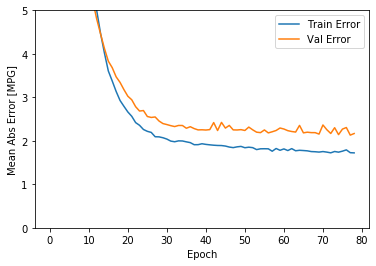

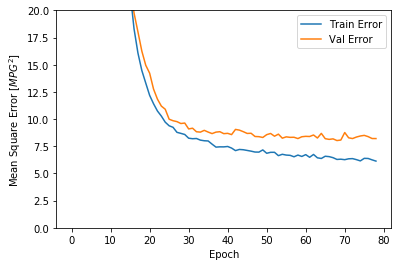

In [87]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
       label = 'Val Error')
plt.ylim([0,5])
plt.legend()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'],
       label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],
       label = 'Val Error')
plt.ylim([0,20])
plt.legend()
plt.show()

In [88]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.1701 - mae: 1.9680 - mse: 6.1701
Testing set Mean Abs Error:  1.97 MPG


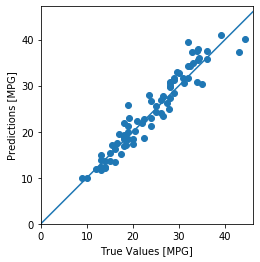

In [90]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

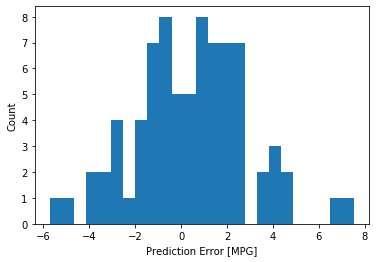

In [91]:
error = test_predictions - test_labels

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")